# Library with empirical spectra

In this tutorial, we will have a look at some brown dwarf spectra from the [IRTF library](http://irtfweb.ifa.hawaii.edu/~spex/IRTF_Spectral_Library/). We will also calculate synthetic fluxes and combine the spectra and photometric fluxes in a plot.

## Getting started

We start by importing [species](https://species.readthedocs.io/en/latest/species.html) and initiating the database with the [SpeciesInit](https://species.readthedocs.io/en/latest/species.core.html#species.core.init.SpeciesInit) class.

In [1]:
import species
species.SpeciesInit()

Initiating species v0.5.1... [DONE]
Creating species_config.ini... [DONE]
Database: /Users/tomasstolker/applications/species/docs/tutorials/species_database.hdf5
Data folder: /Users/tomasstolker/applications/species/docs/tutorials/data
Working folder: /Users/tomasstolker/applications/species/docs/tutorials
Creating species_database.hdf5... [DONE]
Creating data folder... [DONE]


## Adding a spectral library to the database

Next, we create an instance of  [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database), which is used for adding data to the database.

In [2]:
database = species.Database()

We will now download and add the spectral library. For [IRTF](http://irtfweb.ifa.hawaii.edu/~spex/IRTF_Spectral_Library/) spectra, we can set the spectral types that we want to use. The parallax will be queried from [SIMBAD](http://simbad.u-strasbg.fr/simbad/) and several [VizieR](https://vizier.u-strasbg.fr/viz-bin/VizieR) catalogs. A warning will be printed in case no parallax can be retrieved and a `NaN` is stored. Therefore, computing an absolute, synthetic magnitude from these spectra will not be possible.

In [3]:
database.add_spectra(spec_library='irtf', sptypes=['L', 'T'])

Unpacking IRTF Spectral Library... [DONE]
Adding spectra... [DONE]                   


/Users/tomasstolker/.pyenv/versions/3.10.0/envs/species3.10/lib/python3.10/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): 'DENIS-P 025503.3-470049.0' this identifier has an incorrect format for catalog: 	DENIS : Deep Near-Infrared Survey
  warnings.warn("Warning: The script line number %i raised "
/Users/tomasstolker/.pyenv/versions/3.10.0/envs/species3.10/lib/python3.10/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : 2MASS J05591915-1404489
  warnings.warn("Warning: The script line number %i raised "


## Reading a spectral library

To read the spectra from the database, we first create an instance of [ReadSpectrum](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_spectrum.ReadSpectrum). The full spectra are read if the argument of `filter_name` is set to `None`.

In [4]:
read_spectrum = species.ReadSpectrum(spec_library='irtf', filter_name=None)

The spectra are extracted with the [get_spectrum](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_spectrum.ReadSpectrum.get_spectrum) method and by providing a list of spectral types as argument for `sptypes`.

In [5]:
specbox = read_spectrum.get_spectrum(sptypes=['L0', 'L1'])

The method returns a [SpectrumBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.SpectrumBox) with the requested data.

## Opening a SpectrumBox

Let's have a look at the attributes that are stored in the [SpectrumBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.SpectrumBox) by using the [open_box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box.open_box) method, which can be used on any of the [Box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box) objects. Among others, it contains the spectrum, the original names (from the IRTF library) and SIMBAD names, and the distances.

In [6]:
specbox.open_box()

Opening SpectrumBox...
spectrum = None
wavelength = [array([0.8125008, 0.8125008, 0.8127338, ..., 4.126095 , 4.1269007,
       4.127706 ], dtype=float32), array([0.93558633, 0.93558633, 0.93585825, ..., 2.416591  , 2.4171278 ,
       2.417665  ], dtype=float32), array([0.8106775 , 0.8106775 , 0.81091094, ..., 4.113586  , 4.1143913 ,
       4.1151967 ], dtype=float32)]
flux = [array([1.8895840e-14, 1.8895840e-14, 2.1758479e-14, ..., 3.7088523e-15,
       4.1113438e-15, 4.4284915e-15], dtype=float32), array([-1.0867816e-15, -1.0867816e-15,  2.5373139e-15, ...,
        2.0060095e-15,  2.1450817e-15,  2.2615936e-15], dtype=float32), array([3.8497135e-15, 3.8497135e-15, 2.5441878e-15, ..., 1.3200795e-15,
       1.2305833e-15, 1.0569799e-15], dtype=float32)]
error = [array([2.5401353e-15, 2.5401353e-15, 2.8612678e-15, ..., 4.1515258e-16,
       4.3247181e-16, 4.4612945e-16], dtype=float32), array([2.2947999e-15, 2.2947999e-15, 1.3184451e-15, ..., 2.5160439e-16,
       1.7856300e-16, 9.854057

## Synthetic photometry

To calculate synthetic fluxes, we use again the [ReadSpectrum](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_spectrum.ReadSpectrum) class but we now also set the argument of `filter_name` to a filter as listed by the [SVO Filter Profile Service](http://svo2.cab.inta-csic.es/svo/theory/fps/). In this example, use an H-band filter from the MKO system.

In [7]:
read_spectrum = species.ReadSpectrum(spec_library='irtf', filter_name='MKO/NSFCam.H')

Adding filter: MKO/NSFCam.H... [DONE]


The flux is now calculated with the [get_flux](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_spectrum.ReadSpectrum.get_flux) method by again selecting the L0- and L1-type objects.

In [8]:
photbox = read_spectrum.get_flux(sptypes=['L0', 'L1'])

Let's have a look at the content of the returned [PhotometryBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.SpectrumBox).

In [9]:
photbox.open_box()

Opening PhotometryBox...
name = ['2MASS J07464256+2000321', '2MASS J02081833+2542533', '2MASS J14392836+1929149']
sptype = ['L0', 'L1', 'L1']
wavelength = [1.62982596 1.62982596 1.62982596]
flux = [[4.58844233e-14 8.82853048e-18]
 [6.09467685e-15 6.95746497e-18]
 [1.75018643e-14 5.20592825e-18]]
app_mag = None
abs_mag = None
filter_name = ['MKO/NSFCam.H' 'MKO/NSFCam.H' 'MKO/NSFCam.H']


## Plotting spectra and synthetic fluxes

Now that we have created a [SpectrumBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.SpectrumBox) and [PhotometryBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.PhotometryBox), we pass them to the [plot_spectrum](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_spectrum.plot_spectrum) function. The uncertainties on the spectral fluxes have been propagated into the synthetic photometric flux, but the uncertainties are smaller than the plotted markers. The horizontal "error bars" of the fluxes indicate the FWHM of the filter profile.

Adding filter: MKO/NSFCam.J... [DONE]
Adding filter: MKO/NSFCam.Ks... [DONE]
Plotting spectrum... [DONE]


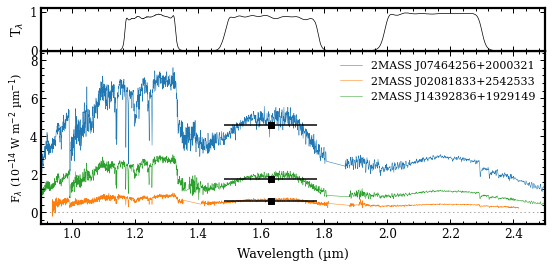

In [10]:
species.plot_spectrum(boxes=[specbox, photbox],
                      filters=['MKO/NSFCam.J', 'MKO/NSFCam.H', 'MKO/NSFCam.Ks'],
                      xlim=(0.9, 2.5),
                      ylim=(-6e-15, 8.5e-14),
                      offset=(-0.14, -0.03),
                      legend={'loc':'upper right', 'frameon': False, 'fontsize': 11.},
                      figsize=(7., 3.),
                      output=None)